На лекции было рассказано, что метод построения решающего дерева определяется следующими пунктами:
- Видом предикатов в вершинах;
- Критерием информативности;
- Критерием останова;
- Методом обработки пропущенных значений;
- Методом стрижки.

Далее мы будем говорить про критерии информативности.

## Критерии информативности в решающих деревьях

При построении дерева необходимо задать *функционал* $Q(X, j, s)$,
на основе которого осуществляется разбиение выборки на каждом шаге.

Рассмотрим различные способы задания таких функционалов в задачах классификации. Пусть $R_m$ &mdash; множество объектов обучающей выборки, попавших в вершину $m$.

- $N_m = |R_m|$ - число таких объектов.
- $p_{mk}$ - доля объектов класса $k$ ($k \in \{1, \dots, K\}$), попавших в вершину $m$:

$$p_{mk}=\frac{1}{N_m} \sum_{(x_i,\,y_i) \in R_m}[y_i = k],$$

- Через $k_m$ обозначим класс, чьих представителей оказалось больше всего среди объектов, попавших в вершину $m$:

$$k_m = \arg \max_k p_{mk}.$$

- Посмотрим как выглядит критерий информативности, который является долей объектов из $R_m$, которые были бы неправильно классифицированы, если бы вершина $m$ была листовой и относила все объекты к классу $k_m$:

$$H_E(R_m)=\frac{1}{N_m}\sum_{(x_i, y_i) \in R_m}[y_i \neq k_m].$$


Функционал ошибки при ветвлении вершины $m$ определяется как
$$
Q_E(R_m, j, s) = H_E(R_m) - \frac{N_\ell}{N_m} H_E(R_\ell) - \frac{N_r}{N_m} H_E(R_r),
$$
где $\ell$ и $r$ - индексы левой и правой дочерних вершин.
Данный функционал необходимо максимизировать.

#### Задача 1
Покажите, что критерий информативности также можно записать в виде 
$$H_E(R_m) = 1 - p_{m, k_m}$$
    
#### Решение    
$$ 
1 = \frac{1}{N_m}\sum_{(x_i,\,y_i) \in R_m}[y_i \neq k_m] + \frac{1}{N_m}\sum_{(x_i,\,y_i) \in R_m}[y_i = k_m] 
$$
$$
H_E(R_m) = \frac{1}{N_m}\sum_{(x_i,\,y_i) \in R_m}[y_i \neq k_m] = 1 - p_{m, k_m}
$$

Данный критерий является достаточно грубым,
поскольку учитывает частоту $p_{m, k_m}$ лишь одного класса.

# Индекс Джини

Критерий информативности в этом случае имеет вид
$$
H_G(R_m)=\sum_{k \neq k'}p_{mk} p_{mk'}.
$$

Функционал ошибки определяется аналогично предыдущему случаю.

#### Задача 2

Покажите, что индекс Джини $H_G(R_m)$ также можно записать в виде: 

$$H_G(R_m) = \sum_{k = 1}^{K} p_{mk} (1 - p_{mk}) = 1 - \sum_{k = 1}^K p_{mk}^2.$$

#### Решение

$$
        \sum_{k \neq k'} p_{mk} p_{mk'}
        =
        \sum_{k = 1}^{K} p_{mk} \sum_{k' \neq k} p_{mk'}
        =
        \sum_{k = 1}^{K} p_{mk} (1 - p_{mk}).
$$

#### Задача 3

Рассмотрим вершину $m$ и объекты $R_m$, попавшие в нее. Сопоставим в соответствие вершине $m$ алгоритм $a(x)$, который выбирает класс случайно, причем класс $k$ выбирается с вероятностью $p_{mk}$. Покажите, что матожидание частоты ошибок этого алгоритма на объектах из $R_m$ равно индексу Джини.



#### Решение

\begin{multline*}
\mathbb E\frac{1}{N_m} \sum_{x_i \in R_m} [y_i \neq a(x_i)]
=
\frac{1}{N_m} \sum_{(x_i,\,y_i) \in R_m} \mathbb E[y_i \neq a(x_i)]
=
\frac{1}{N_m} \sum_{(x_i,\,y_i) \in R_m} (1 - p_{m,y_i})
=\\
=
\sum_{k = 1}^{K} \frac{\sum_{(x_i,\,y_i) \in R_m} [y_i = k]}{N_m} (1 - p_{mk})
=
\sum_{k = 1}^{K} p_{mk} (1 - p_{mk}).
\end{multline*}

Выясним теперь, какой смысл имеет максимизация функционала, соответствующего критерию информативности Джини.
Сразу выбросим из функционала $H_G(R_m)$, поскольку данная величина не зависит от $j$ и $s$.
Преобразуем критерий:

\begin{align*}
&- \frac{N_\ell}{N_m} H_G(R_\ell) - \frac{N_r}{N_m} H_G(R_r)=- \frac{1}{N_m} \left(
N_\ell - \sum_{k = 1}^{K} p_{\ell k}^2 N_\ell + N_r - \sum_{k = 1}^{K} p_{r k}^2 N_r \right)=\\
&=
\frac{1}{N_m} \left(\sum_{k = 1}^{K} p_{\ell k}^2 N_\ell +\sum_{k = 1}^{K} p_{r k}^2 N_r - N_m
\right)= \{\text{$N_m$ не зависит от $j$ и $s$}\} = \\
&=\sum_{k = 1}^{K} p_{\ell k}^2 N_\ell + \sum_{k = 1}^{K} p_{r k}^2 N_r.
\end{align*}

Запишем теперь в наших обозначениях число таких пар объектов $(x_i, x_j)$,
что оба объекта попадают в одно и то же поддерево, и при этом $y_i = y_j$.
Число объектов класса $k$, попавших в поддерево $\ell$,
равно $p_{\ell k} N_\ell$;
соответственно, число пар объектов с одинаковыми метками, попавших в левое
поддерево, равно $\sum_{k = 1}^{K} p_{\ell k}^2 N_\ell^2$.
Интересующая нас величина равна
$$
\sum_{k = 1}^{K} p_{\ell k}^2 N_\ell^2 + \sum_{k = 1}^{K} p_{r k}^2 N_r^2.
$$
Заметим, что данная величина очень похожа на полученное
выше представление для критерия Джини.
Таким образом, максимизацию функционала Джини можно условно
интерпретировать как максимизацию числа пар объектов одного класса,
оказавшихся в одном поддереве.

### Энтропийный критерий
Рассмотрим дискретную случайную величину,
принимающую $K$ значений с вероятностями $p_1, \dots, p_K$
соответственно.
*** Энтропия *** этой случайной величины определяется как $H(p) = -\sum_{k = 1}^{K} p_k \log_2 p_k$.


#### Задача 4
Покажите, что энтропия ограничена сверху и достигает своего максимума на
равномерном распределении $p_1 = \dots = p_K = 1/K$.

#### Решение
Нам понадобится неравенство Йенсена: для любой вогнутой функции $f$
выполнено
$$
    f\left(\sum_{i = 1}^{n} a_i x_i\right) \geq \sum_{i = 1}^{n} a_i f(x_i),
$$
если $\sum_{i = 1}^{n} a_i = 1$.

Применим его к логарифму в определении энтропии~(он является вогнутой функцией):
$$
H(p) = \sum_{k = 1}^{K} p_k \log_2 \frac{1}{p_k}
\leq \log_2 \left( \sum_{k = 1}^{K} p_i \frac{1}{p_i} \right)=\log_2 K.
$$

Наконец, найдем энтропию равномерного распределения:
$$
-\sum_{k = 1}^{K} \frac{1}{K} \log_2 \frac{1}{K} = - K \frac{1}{K} \log_2 \frac{1}{K} = \log_2 K.
$$        


Энтропия ограничена снизу нулем, причем минимум достигается на вырожденных
распределениях ($p_i = 1$, $p_j = 0$ для $i \neq j$).

Энтропийный функционал определяется как
$$
    Q_H(R_m, j, s) = H(p_m) - \frac{N_\ell}{N_m} H(p_\ell) - \frac{N_r}{N_m} H(p_r),
$$
где $p_i = (p_{i1}, \dots, p_{iK})$ - распределение классов в $i$-й вершине.
Видно, что данный критерий отдает предпочтение более <<вырожденным>> распределениям
классов.

### Критерии в задачах регрессии
В задачах регрессии, как правило, в качестве критерия выбирают дисперсию ответов в листе:
$$
H_R(R_m) = \frac{1}{N_m} \sum_{(x_i,\,y_i) \in R_m} \left(y_i-\frac{1}{N_m}\sum_{(x_i,\,y_i) \in R_m} y_j \right)^2.
$$
Можно использовать и другие критерии - например, среднее абсолютное отклонение от медианы.

## Критерий останова построения дерева

Для любой непротиворечивой обучающей выборки можно построить решающее дерево, которое имеет нулевую ошибку на данной выборке. Если мы рассмотрим объекты, как точки в пространстве признаков, то каждую эту точку можно ограничить n-мерным кубиком, который не будет содержать других точек. n-мерный кубик прекрасно можно задать деревом.

 Однако в этом случае имеет место **переобучение**. 

В связи с этим встаёт вопрос: в каком случае вершину следует объявить листовой?

Рассмотрим модельную задачу регрессии. Объектами будут являться точки на плоскости (т.е. каждый объект описывается 2 признаками), целевой переменной — расстояние от объекта до точки (0, 0).

In [30]:
%pylab inline
import numpy as np
import pandas as pd
import pylab as plt
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
sns.set(style='whitegrid')

Populating the interactive namespace from numpy and matplotlib


In [2]:
def get_grid(data):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

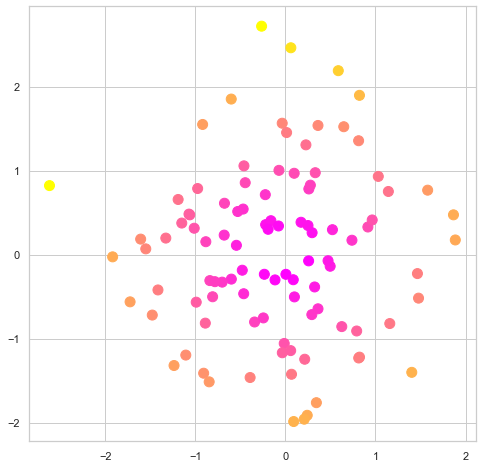

In [3]:
np.random.seed(42)
data_x = np.random.normal(size=(100, 2))
data_y = (data_x[:, 0] ** 2 + data_x[:, 1] ** 2) ** 0.5 # 
plt.figure(figsize=(8, 8))
plt.scatter(data_x[:, 0], data_x[:, 1], c=data_y, s=100, cmap='spring')

In [4]:
from sklearn.tree import DecisionTreeRegressor

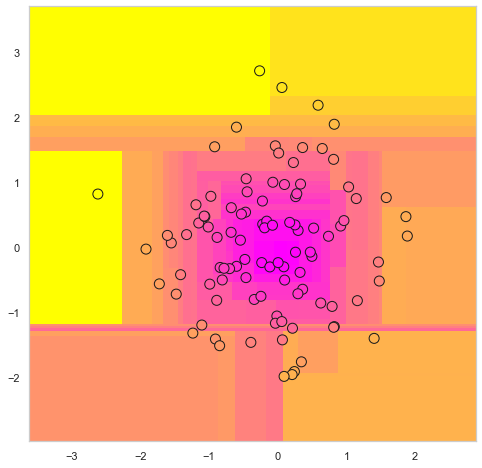

In [5]:
clf = DecisionTreeRegressor(random_state=42)
clf.fit(data_x, data_y)

xx, yy = get_grid(data_x)

predicted = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.figure(figsize=(8, 8))
plt.pcolormesh(xx, yy, predicted, cmap='spring')
plt.scatter(data_x[:, 0], data_x[:, 1], c=data_y, s=100, cmap='spring', edgecolor='k')

Посмотрим как будет выглядить разделение плоскости в зависимости от 
- минимального количества объектов в листе
- максимальной глубины дерева

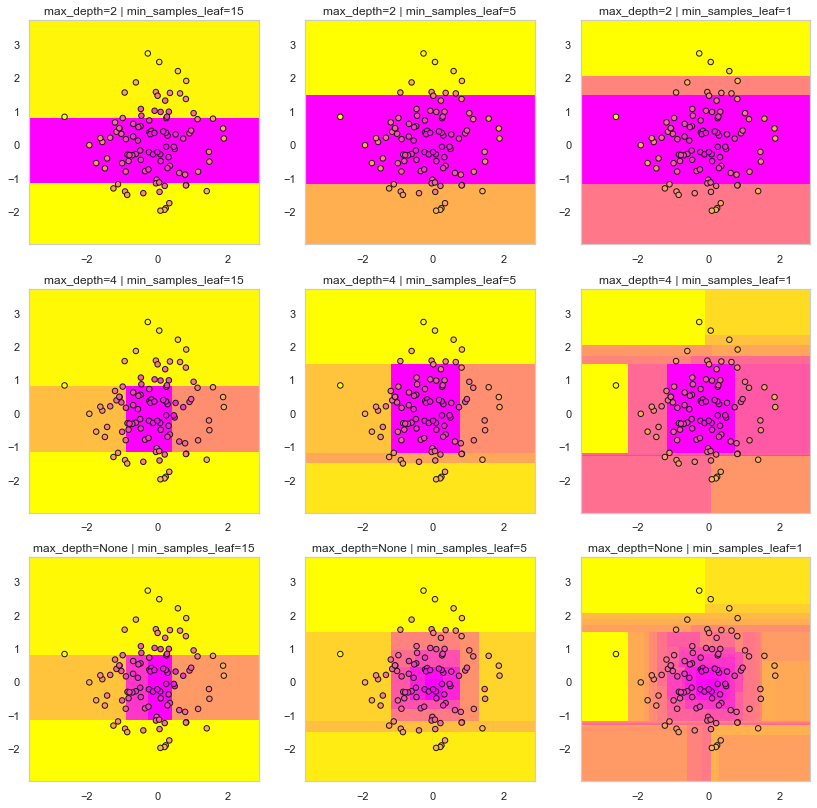

In [6]:
plt.figure(figsize=(14, 14))
for i, max_depth in enumerate([2, 4, None]):
    for j, min_samples_leaf in enumerate([15, 5, 1]):
        clf = DecisionTreeRegressor(max_depth=max_depth, min_samples_leaf=min_samples_leaf)
        clf.fit(data_x, data_y)
        xx, yy = get_grid(data_x)
        predicted = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
        
        plt.subplot2grid((3, 3), (i, j))
        plt.pcolormesh(xx, yy, predicted, cmap='spring')
        plt.scatter(data_x[:, 0], data_x[:, 1], c=data_y, s=30, cmap='spring', edgecolor='k')
        plt.title('max_depth=' + str(max_depth) + ' | min_samples_leaf=' + str(min_samples_leaf))

- Увеличение максимальной глубины и/или уменьшение минимального количества объектов выборки в листе приводит к увеличению качества на обучающей выборке и переобучению.

## Визуализация

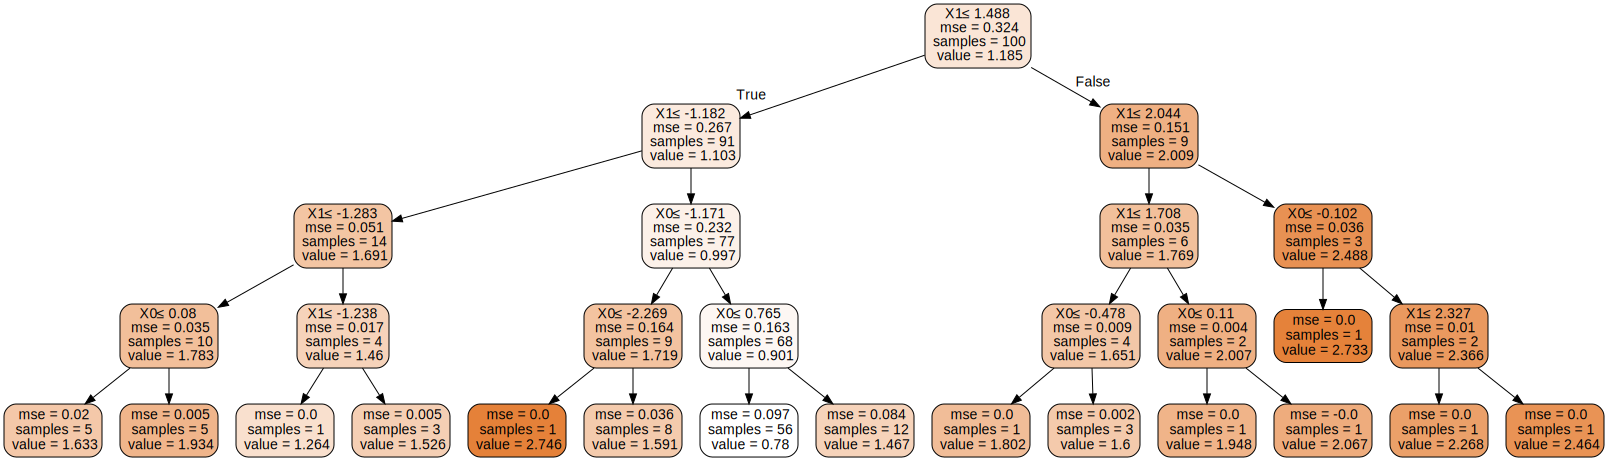

In [7]:
# conda install python-graphviz
import graphviz
from sklearn import tree

clf = DecisionTreeRegressor(max_depth=4)
clf.fit(data_x, data_y)

dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("iris")

dot_data = tree.export_graphviz(clf, out_file=None, 
                                filled=True, rounded=True,  
                                special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

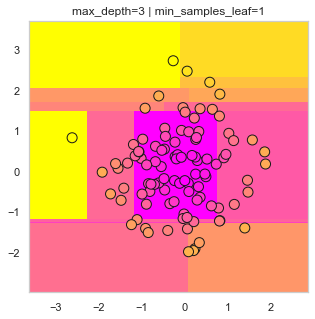

In [8]:
xx, yy = get_grid(data_x)

predicted = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.figure(figsize=(5, 5))
plt.title('max_depth=3 | min_samples_leaf=1')
plt.pcolormesh(xx, yy, predicted, cmap='spring')
plt.scatter(data_x[:, 0], data_x[:, 1], c=data_y, s=100, cmap='spring', edgecolor='k')

* Если для регуляризации использовать только `max_depth` во многих листьях очень малая часть объектоа, что говорит о переобучении, поэтому необходимо также использовать `min_samples_leaf`. 

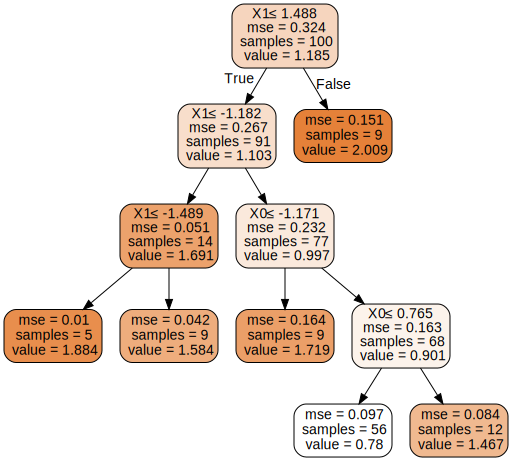

In [9]:
# conda install python-graphviz
import graphviz 

clf = DecisionTreeRegressor(max_depth=4, min_samples_leaf=5)
clf.fit(data_x, data_y)

dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("iris")

dot_data = tree.export_graphviz(clf, out_file=None, 
                                filled=True, rounded=True,  
                                special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 



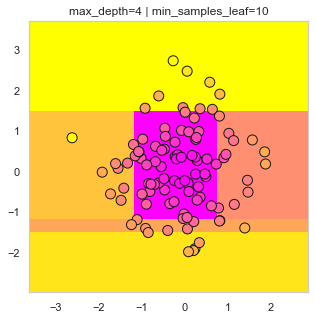

In [10]:
xx, yy = get_grid(data_x)

predicted = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.figure(figsize=(5, 5))
plt.title('max_depth=4 | min_samples_leaf=10')
plt.pcolormesh(xx, yy, predicted, cmap='spring')
plt.scatter(data_x[:, 0], data_x[:, 1], c=data_y, s=100, cmap='spring', edgecolor='k')

## Неустойчивость решающих деревьев

Решающие деревья — это алгоритмы, неустойчивые к изменениям обучающей выборки, т.е. при малейших её изменениях итоговый классификатор может радикально измениться.
Посмотрим, как будет меняться структура дерева при обучении на разных 90%-х подвыборках.


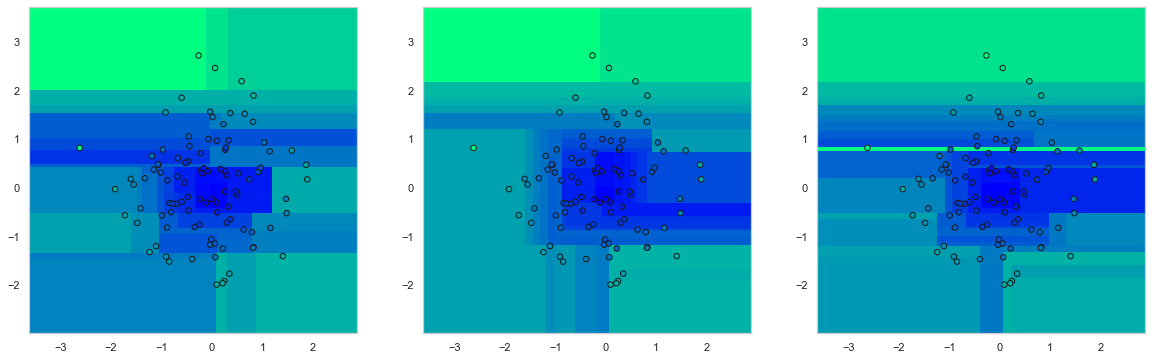

In [11]:
plt.figure(figsize=(20, 6))
for i in range(3):
    clf = DecisionTreeRegressor(random_state=42)

    indecies = np.random.randint(data_x.shape[0], size=int(data_x.shape[0] * 0.9))
    clf.fit(data_x[indecies], data_y[indecies])
    xx, yy = get_grid(data_x)
    predicted = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    plt.subplot2grid((1, 3), (0, i))
    plt.pcolormesh(xx, yy, predicted, cmap='winter')
    plt.scatter(data_x[:, 0], data_x[:, 1], c=data_y, s=30, cmap='winter', edgecolor='k')

## Подбор параметров

Посмотрим на качество дерева в зависимости от параметров на одном из стандартных наборов данных - Бостонском датасете.

Загрузим датасет и посмотрим на него.

In [31]:
from sklearn.datasets import load_boston

data = load_boston()
X = data.data
y = data.target

Сделаем разбиения для кросс-валидации

In [32]:
from sklearn.model_selection import KFold, cross_val_score
cv = KFold(shuffle=True, random_state=241)

Обучим обычное дерево

In [14]:
from sklearn.tree import DecisionTreeRegressor
regr = DecisionTreeRegressor(random_state=241)
-cross_val_score(regr, X, y, cv=cv, 
                 scoring='neg_mean_squared_error').mean()

29.252426713259563

In [15]:
regr.fit(X, y)
regr.tree_

In [16]:
from sklearn.tree import DecisionTreeRegressor
regr = DecisionTreeRegressor(random_state=241)
cross_val_score(regr, X, y, cv=cv, 
                scoring='r2').mean()

0.63896748450608

Теперь переберем разные параметры для дерева

In [40]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(
    DecisionTreeRegressor(random_state=241),
    param_grid={
        'max_features': [
            'auto', 'log2', 'sqrt'
        ],  # the number of features to consider when looking for the best split
        'max_depth': [2, 4, 6, 8, 10, 20, 50],
        'min_samples_leaf': [1, 4, 8, 32],
    },
    cv=cv,
    scoring='r2')
gs.fit(X, y)

GridSearchCV(cv=KFold(n_splits=5, random_state=241, shuffle=True),
             estimator=DecisionTreeRegressor(random_state=241),
             param_grid={'max_depth': [2, 4, 6, 8, 10, 20, 50],
                         'max_features': ['auto', 'log2', 'sqrt'],
                         'min_samples_leaf': [1, 4, 8, 32]},
             scoring='r2')

In [41]:
cv_grid = pd.DataFrame(gs.cv_results_['params'])

cv_grid['mean_test_score'] = gs.cv_results_['mean_test_score']

In [42]:
cv_grid.head()

,max_depth,max_features,min_samples_leaf,mean_test_score
0,2,auto,1,0.628959
1,2,auto,4,0.628959
2,2,auto,8,0.628959
3,2,auto,32,0.592873
4,2,log2,1,0.405284


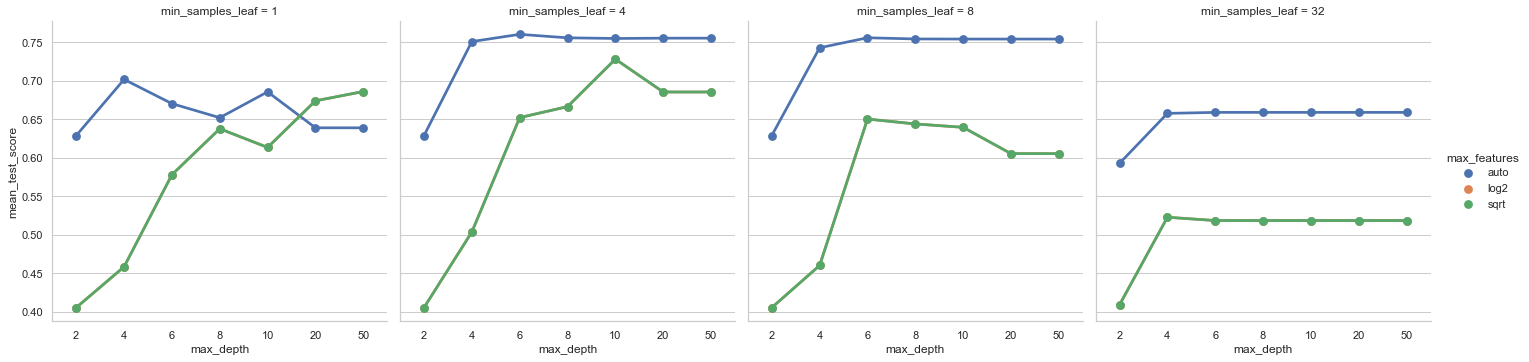

In [43]:
sns.catplot(x='max_depth', y='mean_test_score', data=cv_grid,
            col='min_samples_leaf', hue='max_features',
            kind='point')

* предположите почему при увеличении параметра `min_samples_leaf` дерево перестает переобучаться при росте `max_depth` ?

In [21]:
gs.best_score_

0.7604838117717478

In [22]:
gs.best_params_

{'max_depth': 6, 'max_features': 'auto', 'min_samples_leaf': 4}

## Oblivious Decision Tree

![](https://qph.fs.quoracdn.net/main-qimg-5274e48e1766230e22e3cdd7e83019ce)

* Один предикат вида $[x_j < t]$ для каждого уровня.
* Слабее обычных деревьев, препятствуют переобучению.
* Гораздо эффективнее произвольных деревьев.
* Достаточно хранить последовательность порогов и номеров признаков.
* Каждому листу можно сопоставить уникальную последовательность 0 и 1, которое соответствует натуральному числу (индекс). Можно хранить листья как массив и обращать к ним по индексу.

![](https://qph.fs.quoracdn.net/main-qimg-c8457d5d20273f0368f801d6593aa667)

## Multivariate Adaptive Regression Splines Model (MARS)

$$ f(x) = \sum_{i=1}^M w_i B_i(x) $$
$$ B_i(x) = \prod_{j=1}^{m_i} \left[ \alpha_{ij} (t_{ij} - x)_+ + \beta_{ij} (x - t_{ij})_+ \right]$$

где $(t_{ij} - x)_+ = \max(0, t_{ij} - x)$ -- hinge функция:




![](https://upload.wikimedia.org/wikipedia/commons/7/74/Friedmans_mars_hinge_functions.png)

__При чем тут деревья?__

* Вспомним что предсказание дерева $a(x)$ можно выразить как:
$$ a(x) = \sum_{i=1}^M w_i [x \in J_i] = \sum_{i=1}^M w_i \prod _{j=1}^{m_i}\left( \alpha_{ij} [x < t_{ij}] + \beta_{ij} [x \geq t_{ij}] \right),$$
где $\alpha_{ij}, \beta_{ij} \in \{0, 1\}$ и $\alpha_{ij} \cdot \beta_{ij} = 0$, $m_i$ -- глубина дерева до листа $J_i$.

* Можно заметить, что дерево имеет похожую на MARS структуру, только с индикатарами вместо hindge функции.
* Обучаются такие модели тоже жадными алгоритмами.

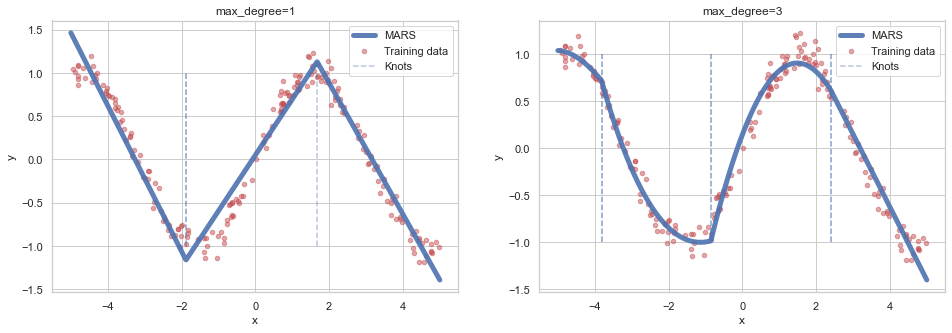

In [23]:
import numpy as np
from pyearth import Earth
    
#Create some fake data
def f(x):
    return x ** 2
numpy.random.seed(0)
m = 200
n = 10
X = 10 * (numpy.random.uniform(size=(m,1)) - 0.5)
y = np.sin(X[:, 0]) + .1*numpy.random.normal(size=m)
test = np.linspace(-5, 5, 1000)[:, np.newaxis]
y_test = np.sin(test[:, 0])
#Fit an Earth model
# plt.subplot(1, 2, 1)

plt.figure(figsize=(16, 5))

for i, degree in enumerate([1, 3]):
    plt.subplot(1, 2, i + 1)
    model = Earth(max_terms=5, max_degree=degree)
    model.fit(X,y)

    y_hat = model.predict(test)
    knots = list(map(lambda x: x.get_knot(), list(model.basis_.piter())[1:]))

    plt.scatter(X, y, s=20, c='r', alpha=.5, label='Training data')
    plt.plot(test, y_hat, lw=5, alpha=.9, label='MARS')
    plt.vlines(knots, -1, 1, linestyles='--', alpha=.4, label='Knots')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('max_degree=%d'%degree)
    plt.legend()

In [24]:
print(model.summary())

Earth Model
-------------------------------------------------------------------
Basis Function                                Pruned  Coefficient  
-------------------------------------------------------------------
(Intercept)                                   No      0.618697     
h(x0-2.39551)                                 No      -0.77481     
h(2.39551-x0)                                 No      -0.493397    
h(x0+0.853381)*h(2.39551-x0)                  No      0.345539     
h(-0.853381-x0)*h(2.39551-x0)                 No      0.171971     
h(x0+3.81726)*h(-0.853381-x0)*h(2.39551-x0)   No      -0.0176479   
h(-3.81726-x0)*h(-0.853381-x0)*h(2.39551-x0)  No      -0.0332385   
-------------------------------------------------------------------
MSE: 0.0157, GCV: 0.0186, RSQ: 0.9724, GRSQ: 0.9677


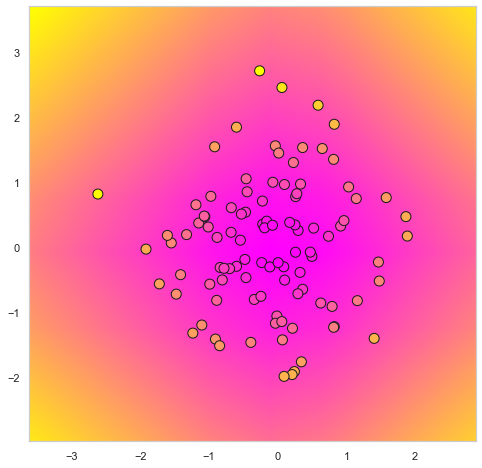

In [25]:
clf = Earth()
clf.fit(data_x, data_y)

xx, yy = get_grid(data_x)

predicted = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.figure(figsize=(8, 8))
plt.pcolormesh(xx, yy, predicted, cmap='spring')
plt.scatter(data_x[:, 0], data_x[:, 1], c=data_y, s=100, cmap='spring', edgecolor='k')

Сравним с обычными деревьями на BostonHausing

In [26]:
from sklearn.datasets import load_boston
from sklearn.model_selection import KFold, cross_val_score


data = load_boston()
X = data.data
y = data.target
cv = KFold(shuffle=True, random_state=241)

In [27]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(Earth(),
                  param_grid={
                      'max_degree': [1, 2, 3],
                      'max_terms': [5, 10, 15, 20],
                      'penalty': np.logspace(-4, 0, 5),
                  },
                  cv=cv,
                  scoring='r2')
gs.fit(X, y)

GridSearchCV(cv=KFold(n_splits=5, random_state=241, shuffle=True),
             estimator=Earth(),
             param_grid={'max_degree': [1, 2, 3], 'max_terms': [5, 10, 15, 20],
                         'penalty': array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00])},
             scoring='r2')

In [28]:
gs.best_score_

0.8377945816709536

In [29]:
gs.best_params_

{'max_degree': 3, 'max_terms': 15, 'penalty': 0.0001}